In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure
%matplotlib notebook

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 3

In [3]:
# Define the function
def rhs_ivp(x, y, ep, gamma):
    f1 = y[1]
    f2 = ((gamma*np.abs(y[0])**2)+x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [4]:
# Define some constants 
K = 1
L = 3
ep_start = 0
tol = 10**(-5) 

xp = [-L, L]
x_span = np.linspace(-L,L,20*L+1) 
gamma = -0.05

ep = ep_start
dep = K/100 

In [5]:
# Define our initial conditions 
A = 0.000001 # This will change
y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
y0

array([1.e-06, 3.e-12])

<IPython.core.display.Javascript object>


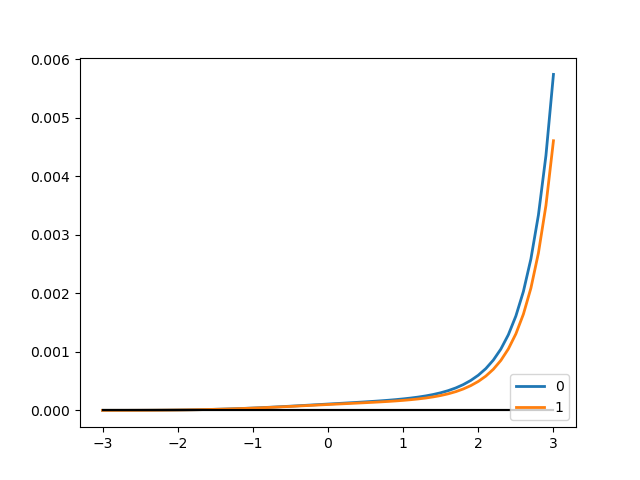

In [6]:
A15 = np.array([])
A_Eigenfunctions = {}

for modes in range(2):
    ep = ep_start
    dep = K/100
    
    for j in range(1000): # using for loop to make sure it stops. 
        # update initial condition
        y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2
        
        #compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1) #norm
        boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
# Norm Shooting 
        
        #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
        if boundary < tol and norm < tol:
            break
        else:
            A = A/np.sqrt(norm)
        
        # update initial condition with new A 
        y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        #compute norm and boundary conditions 
        norm = np.abs(scipy.integrate.trapz(y_sol**2,x_span)-1) #norm
        boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
# BC Shooting
        
        if boundary < tol and norm < tol:
            break
        elif (-1)**(modes)*boundary > tol and norm < tol:
            ep = ep + dep
        else:
            ep = ep - dep/2
            dep = dep/2
    
    ep_start = ep + 0.1 
    A = A
    
    A15 = np.append(A15, ep)
    A_Eigenfunctions[modes] = y_sol
    
    plt.plot(sol.t, y_sol, linewidth=2, label = modes)
#     plt.plot(sol.t, sol.y[0, :], linewidth=2)
    plt.plot(sol.t, 0*sol.t, 'k')
    plt.legend(loc="lower right")

In [7]:
norm

0.9999957169569804

In [8]:
print('Eigenvalues:', A15)

Eigenvalues: [-0.01  0.08]


In [9]:
print('Eigenfunctions:', A_Eigenfunctions)

Eigenfunctions: {0: array([1.00328537e-06, 1.04781167e-06, 1.16597266e-06, 1.35407066e-06,
       1.64165682e-06, 2.05709184e-06, 2.62726468e-06, 3.37759259e-06,
       4.33202111e-06, 5.51302406e-06, 6.94160356e-06, 8.63729000e-06,
       1.06181421e-05, 1.29217938e-05, 1.56001455e-05, 1.86800593e-05,
       2.21807710e-05, 2.61139419e-05, 3.04836592e-05, 3.52864358e-05,
       4.05112104e-05, 4.61393474e-05, 5.21446371e-05, 5.84932953e-05,
       6.51439638e-05, 7.20477099e-05, 7.91484405e-05, 8.63986028e-05,
       9.37319764e-05, 1.01092914e-04, 1.08453483e-04, 1.15813470e-04,
       1.23200374e-04, 1.30669412e-04, 1.38303517e-04, 1.46213337e-04,
       1.54537237e-04, 1.63441298e-04, 1.73132034e-04, 1.84095194e-04,
       1.96591370e-04, 2.10941174e-04, 2.27701578e-04, 2.47665925e-04,
       2.71863919e-04, 3.01561632e-04, 3.38261501e-04, 3.83905507e-04,
       4.41195616e-04, 5.12355954e-04, 6.01436012e-04, 7.14588566e-04,
       8.60069678e-04, 1.04823869e-03, 1.29356728e-03, 1.

In [10]:
A13 = A_Eigenfunctions[0]
A14 = A_Eigenfunctions[1]

In [11]:
A13

array([1.00328537e-06, 1.04781167e-06, 1.16597266e-06, 1.35407066e-06,
       1.64165682e-06, 2.05709184e-06, 2.62726468e-06, 3.37759259e-06,
       4.33202111e-06, 5.51302406e-06, 6.94160356e-06, 8.63729000e-06,
       1.06181421e-05, 1.29217938e-05, 1.56001455e-05, 1.86800593e-05,
       2.21807710e-05, 2.61139419e-05, 3.04836592e-05, 3.52864358e-05,
       4.05112104e-05, 4.61393474e-05, 5.21446371e-05, 5.84932953e-05,
       6.51439638e-05, 7.20477099e-05, 7.91484405e-05, 8.63986028e-05,
       9.37319764e-05, 1.01092914e-04, 1.08453483e-04, 1.15813470e-04,
       1.23200374e-04, 1.30669412e-04, 1.38303517e-04, 1.46213337e-04,
       1.54537237e-04, 1.63441298e-04, 1.73132034e-04, 1.84095194e-04,
       1.96591370e-04, 2.10941174e-04, 2.27701578e-04, 2.47665925e-04,
       2.71863919e-04, 3.01561632e-04, 3.38261501e-04, 3.83905507e-04,
       4.41195616e-04, 5.12355954e-04, 6.01436012e-04, 7.14588566e-04,
       8.60069678e-04, 1.04823869e-03, 1.29356728e-03, 1.61381748e-03,
      

In [12]:
A14

array([1.00543138e-06, 1.04959387e-06, 1.16731030e-06, 1.35435738e-06,
       1.63938804e-06, 2.04986732e-06, 2.61173827e-06, 3.34942197e-06,
       4.28581752e-06, 5.44230205e-06, 6.83873070e-06, 8.49343666e-06,
       1.04232311e-05, 1.26617195e-05, 1.52594635e-05, 1.82373828e-05,
       2.16087821e-05, 2.53797171e-05, 2.95489945e-05, 3.41081719e-05,
       3.90415579e-05, 4.43262119e-05, 4.99319444e-05, 5.58213168e-05,
       6.19496415e-05, 6.82649818e-05, 7.47081519e-05, 8.12201817e-05,
       8.77404556e-05, 9.42127848e-05, 1.00605401e-04, 1.06911118e-04,
       1.13147330e-04, 1.19356016e-04, 1.25603734e-04, 1.31981626e-04,
       1.38605413e-04, 1.45615402e-04, 1.53226385e-04, 1.61849302e-04,
       1.71636516e-04, 1.82868566e-04, 1.96015866e-04, 2.11738708e-04,
       2.30887263e-04, 2.54501577e-04, 2.83811574e-04, 3.20344646e-04,
       3.66393811e-04, 4.23694081e-04, 4.95363378e-04, 5.86292118e-04,
       7.03143219e-04, 8.54352094e-04, 1.05113935e-03, 1.30864106e-03,
      

In [13]:
A15

array([-0.01,  0.08])

In [ ]:
for j in range(3): # using for loop to make sure it stops. 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        norm = scipy.integrate.trapz(y_sol**2) #norm
        
        # Norm Shooting 
        
        if (np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1]) < tol) and norm < tol:
            print("True")
            break
        else:
            print("False")
            print(A)
            A = A/np.sqrt(norm)
            print(A)
        
        y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
        print(y0)
        
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)     

In [ ]:
A15 = np.array([])
A_Eigenfunctions = {}

for modes in range(2):
    ep = ep_start
    dep = K/100
    
    for j in range(1000): # using for loop to make sure it stops. 
        # update initial condition
        y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2
        
        #compute norm and boundary conditions 
        norm = scipy.integrate.trapz(y_sol**2,x_span) #norm
        boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
        # Norm Shooting 
        
        #if norm and boundary condiiton met, break, else A = A/sqrt(norm)
        if boundary < tol and norm < tol:
            break
        else:
#             print(r'A before', A)
            A = A/np.sqrt(norm)
#             print(r'A after', A)
        
        # update initial condition with new A 
        y0 = np.array([A,(((gamma*(A**2) + (K*L**2) - ep))**.5)*(A**2)])
        
        # solve ODE 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhs_ivp(x,y,ep,gamma), xp, y0, t_eval = x_span)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        #compute norm and boundary conditions 
        norm = scipy.integrate.trapz(y_sol**2,x_span) #norm
        boundary = np.abs(y_sol_dx[-1] + (((gamma*np.abs(y_sol[-1])**2)+(K*L**2)-ep)**.5)*y_sol[-1])
        
        # BC Shooting
        
        if boundary < tol and norm < tol:
            break
        elif (-1)**(modes)*boundary > tol and norm < tol:
            ep = ep + dep
        else:
#             print(r'norm', norm)
#             print(r'requirement', boundary)
            ep = ep - dep/2
            dep = dep/2
    
    ep_start = ep + 0.1 
    
    A15 = np.append(A15, ep)
    A_Eigenfunctions[modes] = y_sol
    
    plt.plot(sol.t, y_sol, linewidth=2)
#     plt.plot(sol.t, sol.y[0, :], linewidth=2)
    plt.plot(sol.t, 0*sol.t, 'k')